In [1]:
# ---- EDA STARTER ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create mock data (temporary)
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    "TARGET": np.random.choice([0,1], size=n, p=[0.92,0.08]),
    "AMT_INCOME_TOTAL": np.random.randint(20000, 300000, size=n),
    "AMT_CREDIT": np.random.randint(5000, 800000, size=n),
    "AMT_ANNUITY": np.random.randint(1000, 50000, size=n),
    "DAYS_EMPLOYED": np.random.randint(-5000, 0, size=n),
    "DAYS_BIRTH": np.random.randint(-25000, 0, size=n),
    "CODE_GENDER": np.random.choice(["M","F"], size=n),
    "NAME_CONTRACT_TYPE": np.random.choice(["Cash loans","Revolving loans"], size=n),
    "OWN_CAR": np.random.choice(["Y","N"], size=n),
})
df.to_csv("../data/mock_application_train.csv", index=False)


In [3]:
# ---- basic stats ----
print("Shape:", df.shape)
print("\nDefault rate (%):")
print(df['TARGET'].value_counts(normalize=True)*100)

Shape: (1000, 9)

Default rate (%):
TARGET
0    92.1
1     7.9
Name: proportion, dtype: float64


In [4]:
# ---- missing values ----
missing = df.isnull().mean().sort_values(ascending=False)*100
print("\nTop missing columns:")
print(missing.head(10))


Top missing columns:
TARGET                0.0
AMT_INCOME_TOTAL      0.0
AMT_CREDIT            0.0
AMT_ANNUITY           0.0
DAYS_EMPLOYED         0.0
DAYS_BIRTH            0.0
CODE_GENDER           0.0
NAME_CONTRACT_TYPE    0.0
OWN_CAR               0.0
dtype: float64


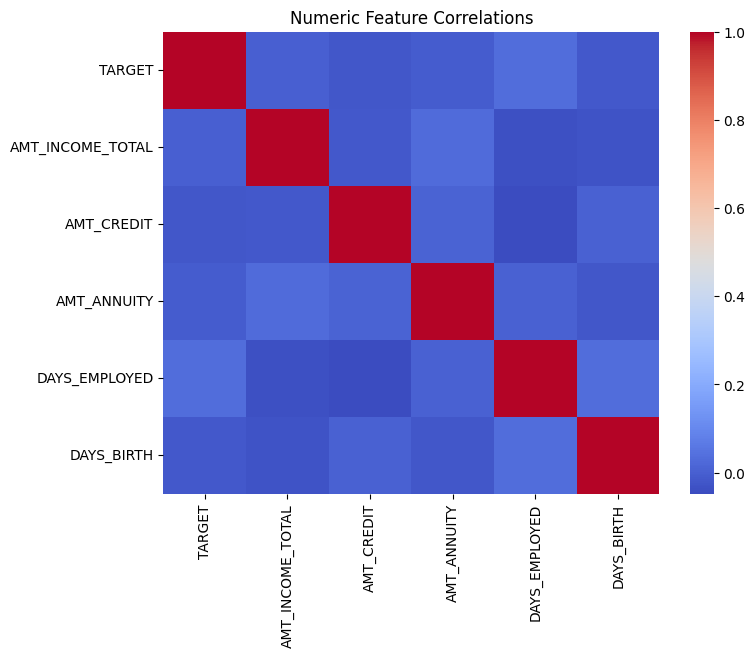

In [5]:
# ---- correlation heatmap ----
num_cols = df.select_dtypes(include=np.number).columns
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Numeric Feature Correlations")
plt.show()

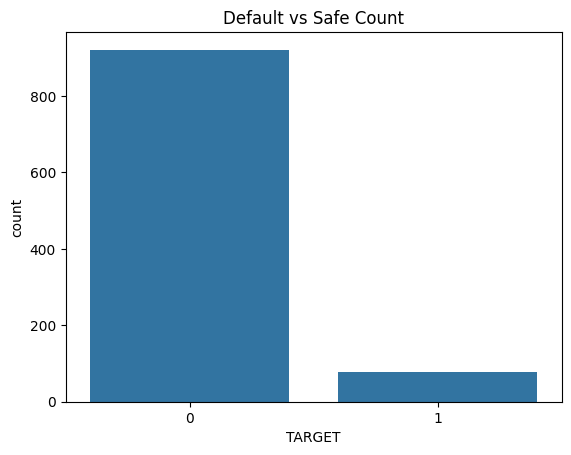

In [6]:

# ---- target distribution ----
sns.countplot(x='TARGET', data=df)
plt.title("Default vs Safe Count")
plt.show()